In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 66.2MB 56kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn import multioutput
mor=multioutput.MultiOutputRegressor
import time

In [ ]:
import pickle
from joblib import dump, load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "drive/My Drive/models/data.csv"
data = pd.read_csv(path)
path = "drive/My Drive/cvdata1.csv"
data = data.append(pd.read_csv(path))
path = "drive/My Drive/cvdata2.csv"
data = data.append(pd.read_csv(path))
path = "drive/My Drive/cvdata3.csv"
data = data.append(pd.read_csv(path))
path = "drive/My Drive/cvdata4.csv"
data2 = pd.read_csv(path)

In [ ]:
xcol=['H0','T0','B0','K']
ycol=[]
for temp in range(2500):
  ycol.append('Ts'+str(temp))
catcol=[]
for temp in ycol:
  if abs(data[temp]).sum(axis=0)==0:
    continue
  else:
    catcol.append(temp)
df2=pd.DataFrame()
df2[xcol]=(data2[xcol]-data[xcol].mean())/(data[xcol].max()-data[xcol].min())
df2[catcol]=(data2[catcol]-data[catcol].mean())/(data[catcol].max()-data[catcol].min())
X=df2[xcol].to_numpy()
Y=df2[catcol].to_numpy()

In [ ]:
reg=load('drive/My Drive/models/NNmodel.jb')
rfr=load('drive/My Drive/models/RFmodel.jb')
xgbr=load('drive/My Drive/XGBmodel.jb')
lbgr=load('drive/My Drive/models/LGBMmodel.jb')
cat=load('drive/My Drive/models/CATBmodel.jb')

In [ ]:
start = time.time()
cat.predict(data2[xcol].iloc[[ro]])
end = time.time()
print(-start+end)

2.496582508087158


In [ ]:
ro=17    #pick a random number which selects an row from test set
data2[xcol].iloc[[ro]]

,H0,T0,B0,K
17,1414.0,935.0,1.0,307.155988


In [ ]:
lbgp=lbgr.predict(data2[xcol].iloc[[ro]])
rfp=rfr.predict(data2[xcol].iloc[[ro]])
xgbp=xgbr.predict(data2[xcol].iloc[[ro]])
dfn=pd.DataFrame(data=np.zeros([2,2500]), columns=ycol)
dfn2=pd.DataFrame(data=cat.predict(data2[xcol].iloc[[ro]]),columns=catcol)
dfn3=(pd.DataFrame(data=reg.predict(df2[xcol].iloc[[ro]]),columns=catcol)*(data[catcol].max()-data[catcol].min())+data[catcol].mean())
for temp in catcol:
  dfn.at[0,temp]=dfn2.at[0,temp]
  dfn.at[1,temp]=dfn3.at[0,temp]
ts=data2[ycol].iloc[[ro]].to_numpy()
nnp=dfn[ycol].iloc[[1]].to_numpy()
catp=dfn[ycol].iloc[[0]].to_numpy()
nnp=nnp.reshape([50,50])
catp=catp.reshape([50,50])
xgbp=xgbp.reshape([50,50])
rfp=rfp.reshape([50,50])
lbgp=lbgp.reshape([50,50])
ts=ts.reshape([50,50])

In [ ]:
xax=np.arange(50)
yax=np.arange(50)
Xax, Yax = np.meshgrid(xax, yax)

In [ ]:
np.mean(ts**2)**0.5

196.62023945275655

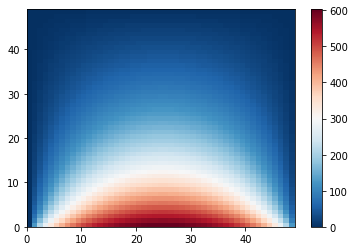

In [ ]:
surf = plt.pcolor(Xax, Yax, ts, cmap='RdBu_r',vmin=ts.min(), vmax=ts.max())
plt.colorbar() #plot of original one

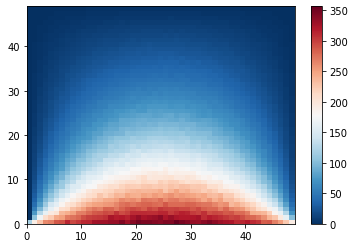

In [ ]:
surf = plt.pcolor(Xax, Yax, nnp, cmap='RdBu_r') #plot of NN prediction
plt.colorbar()

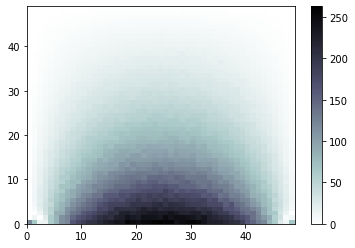

In [ ]:
surf = plt.pcolor(Xax, Yax, abs(nnp-ts), cmap='bone_r',vmin=0, vmax=abs(nnp-ts).max()) #error of NN prediction
plt.colorbar()

In [ ]:
np.max(abs(catp-ts))

34.81299457438115

In [ ]:
vvvtemp.shape

(50, 50)

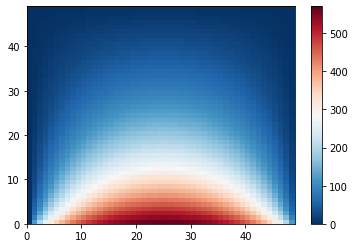

In [ ]:
surf = plt.pcolor(Xax, Yax, rfp, cmap='RdBu_r') #plot of random forest prediction
plt.colorbar()

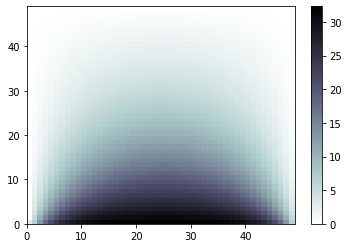

In [ ]:
surf = plt.pcolor(Xax, Yax, abs(rfp-ts), cmap='bone_r',vmin=0, vmax=abs(rfp-ts).max()) #error of RR prediction
plt.colorbar()

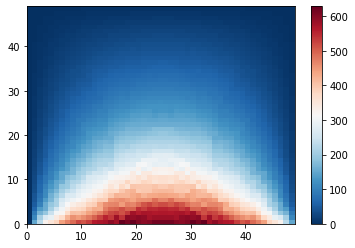

In [ ]:
surf = plt.pcolor(Xax, Yax, xgbp,  cmap='RdBu_r') #plot of xgb prediction
plt.colorbar()

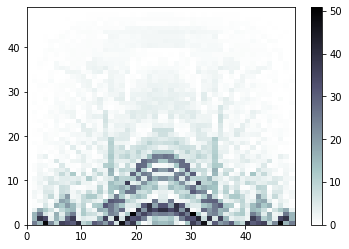

In [ ]:
surf = plt.pcolor(Xax, Yax, abs(xgbp-ts), cmap='bone_r',vmin=0, vmax=abs(xgbp-ts).max()) #error of XGB prediction
plt.colorbar()

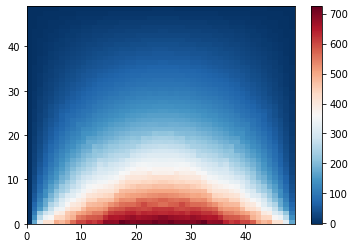

In [ ]:
surf = plt.pcolor(Xax, Yax, lbgp, cmap='RdBu_r') #plot of lbgm prediction
plt.colorbar()

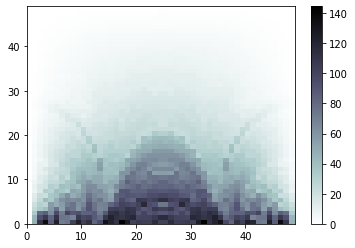

In [ ]:
surf = plt.pcolor(Xax, Yax, abs(lbgp-ts), cmap='bone_r',vmin=0, vmax=abs(lbgp-ts).max()) #error of LBGM prediction
plt.colorbar()

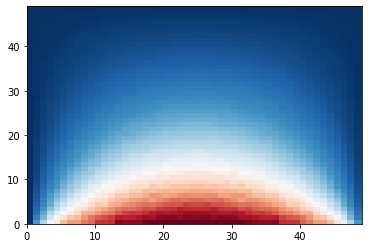

In [ ]:
surf = plt.pcolor(Xax, Yax, catp,  cmap='RdBu_r',vmin=ts.min(), vmax=ts.max()) #plot of cat boost prediction

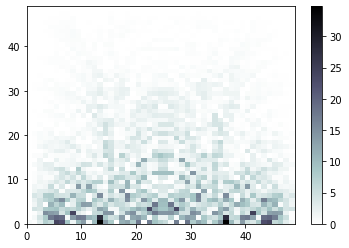

In [ ]:
surf = plt.pcolor(Xax, Yax, abs(catp-ts), cmap='bone_r',vmin=0, vmax=abs(catp-ts).max()) #error of NN prediction
plt.colorbar()